In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, classification_report,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 
from treatment import get_treated_data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
X_train, X_test, y_train, y_test = get_treated_data()

In [3]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [4]:
y_pred = nb_model.predict(X_test)

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.933641975308642


In [6]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1624
           1       0.91      0.97      0.94      1616

    accuracy                           0.93      3240
   macro avg       0.94      0.93      0.93      3240
weighted avg       0.94      0.93      0.93      3240



In [7]:
confusion_matrix_ = confusion_matrix(y_test, y_pred)

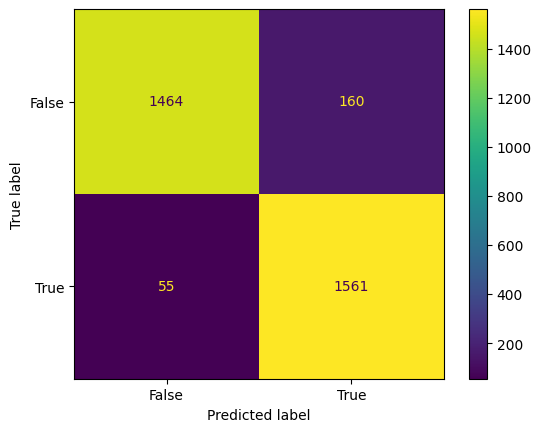

In [8]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])

cm_display.plot()
plt.show()

In [9]:
#Implementação do Grid Search

In [10]:
param_grid = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}

In [11]:
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)},
             scoring='f1')

In [12]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'alpha': 0.001}


In [13]:
best_nb_model = grid_search.best_estimator_


In [14]:
best_nb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.001)

In [15]:
grid_pred = best_nb_model.predict(X_test)

In [16]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.9373456790123457


In [17]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1624
           1       0.91      0.97      0.94      1616

    accuracy                           0.94      3240
   macro avg       0.94      0.94      0.94      3240
weighted avg       0.94      0.94      0.94      3240



In [18]:
grid_confusion_matrix = confusion_matrix(y_test, grid_pred)

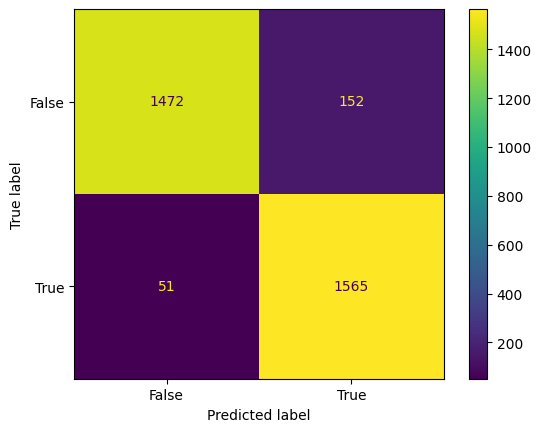

In [19]:
grid_cm_display = ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()

In [20]:
# test_text = "Congratulations! You've won a free vacation. Claim your prize now!"

# processed_test_text = finalpreprocess(test_text)

# print("Texto de teste após pré-processamento:", processed_test_text)

# prediction = best_decision_tree_model.predict(processed_test_text)

# if prediction[0]:
#     print("O texto é spam!")
# else:
#     print("O texto não é spam (ham)!")

NameError: name 'finalpreprocess' is not defined